# This is used for a test

In [250]:
import cv2, simplejson, os, shutil
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import random

In [251]:
fileName = '20170507T155114.708081'
fileNameVideo = fileName + '.avi'
vidcap = cv2.VideoCapture(fileNameVideo)

In [252]:
fileNameEvents = fileName + '-events.json'
events = simplejson.loads(open(fileNameEvents).read())
events

[{'end-frame': 111,
  'event-class': '0 added',
  'object-class': 'Clover Organic 2% Milk',
  'start-frame': 81},
 {'end-frame': 135,
  'event-class': '1 removed',
  'object-class': 'Clover Organic 2% Milk',
  'start-frame': 111},
 {'end-frame': 176,
  'event-class': '0 added',
  'object-class': 'Horizon Organic Chocolate Milk',
  'start-frame': 141},
 {'end-frame': 196,
  'event-class': '1 removed',
  'object-class': 'Horizon Organic Chocolate Milk',
  'start-frame': 176},
 {'end-frame': 228,
  'event-class': '0 added',
  'object-class': 'Horizon Organic Chocolate Milk',
  'start-frame': 208},
 {'end-frame': 264,
  'event-class': '1 removed',
  'object-class': 'Horizon Organic Chocolate Milk',
  'start-frame': 234}]

In [253]:
dataDict = {}
dataDict['data'] = []
dataDict['label'] = []
frames_start =[]
frames_end = []
for idx, event in enumerate(events):
    if event['event-class'] == '0 added':
        frames_start.append(event['start-frame'])
        frames_end.append(event['end-frame']-1)
        dataDict['label'].append(0)
    elif event['event-class'] == '0 removed':
        frames_start.append(event['start-frame'])
        frames_end.append(event['end-frame']-1)
        dataDict['label'].append(1)
    elif event['event-class'] == '1 added':
        frames_start.append(event['start-frame'])
        frames_end.append(event['end-frame']-1)
        dataDict['label'].append(2)
    elif event['event-class'] == '1 removed':
        frames_start.append(event['start-frame'])
        frames_end.append(event['end-frame']-1)
        dataDict['label'].append(3)
frames_start = np.array(frames_start)
frames_end = np.array(frames_end)
print(frames_start)
print(frames_end)
print (dataDict['label'])

[ 81 111 141 176 208 234]
[110 134 175 195 227 263]
[0, 3, 0, 3, 0, 3]


In [254]:
def get_frames(n, frames_start, frames_end):
    frames = np.zeros((n,frames_start.shape[0]))
    for i in range(frames_start.shape[0]):
        var = random.sample(range(int(frames_start[i]), int(frames_end[i])), n)
        var = np.sort(var)
        frames[:,i] = var
    frames = np.floor(frames)
    return frames
frames = get_frames(5, frames_start, frames_end)
print (frames)

[[  84.  112.  149.  178.  218.  237.]
 [  87.  117.  158.  185.  219.  247.]
 [  89.  123.  159.  187.  220.  248.]
 [  99.  124.  161.  190.  223.  252.]
 [ 109.  128.  169.  192.  224.  259.]]


In [255]:
num_frame_per_video = 5
num_sample_per_video = 10

inputSize = 224
dirname = 'img'
data_len = frames_start.shape[0]
vidcap = cv2.VideoCapture(fileNameVideo)
if not os.path.isdir(dirname):
    os.mkdir(dirname)

for j in range(num_sample_per_video):
    frames = get_frames(num_frame_per_video, frames_start, frames_end)
    print (frames)
    for i in range(data_len):
        vidcap = cv2.VideoCapture(fileNameVideo)
        success,image = vidcap.read()
        count = 0
        success = True
        one_data = []
        while success:
            success,image = vidcap.read()
            #print('Read a new frame: '), success
            if np.any(frames[:,i] == count):
                image_crop = image[100:500, 150:800]
                image_down = cv2.resize(image_crop, dsize=(inputSize,inputSize), interpolation = cv2.INTER_CUBIC)
                imageFileName = '%s/f%d.jpg' % (dirname, count)
                cv2.imwrite(imageFileName, image_down)     # save frame as JPEG file
                one_data.append(image_down)
            count += 1
        dataDict['data'].append(one_data)
        vidcap.release()
dataDict['label'] = dataDict['label']*num_sample_per_video


[[  81.  111.  144.  176.  211.  234.]
 [  92.  114.  145.  186.  212.  238.]
 [  93.  119.  155.  188.  213.  247.]
 [ 100.  129.  172.  189.  215.  256.]
 [ 106.  131.  173.  192.  217.  262.]]
[[  83.  115.  146.  179.  212.  236.]
 [  86.  116.  148.  182.  215.  243.]
 [  90.  121.  154.  183.  216.  244.]
 [  98.  129.  156.  186.  221.  257.]
 [ 103.  132.  169.  189.  224.  262.]]
[[  81.  118.  141.  176.  211.  237.]
 [  84.  119.  145.  179.  212.  241.]
 [  92.  127.  153.  181.  214.  246.]
 [  99.  128.  165.  185.  215.  252.]
 [ 102.  129.  171.  193.  219.  254.]]
[[  87.  111.  143.  177.  209.  234.]
 [ 100.  116.  149.  184.  214.  237.]
 [ 103.  117.  156.  188.  216.  253.]
 [ 104.  119.  157.  191.  225.  255.]
 [ 106.  131.  171.  192.  226.  262.]]
[[  82.  115.  149.  181.  208.  234.]
 [  87.  116.  155.  185.  212.  238.]
 [  88.  121.  162.  188.  213.  250.]
 [  92.  130.  163.  190.  221.  252.]
 [  94.  132.  171.  193.  225.  255.]]
[[  82.  116.  168. 

In [256]:
print (np.array(dataDict['label']).shape)
print (np.array(dataDict['data']).shape)

(60,)
(60, 5, 224, 224, 3)


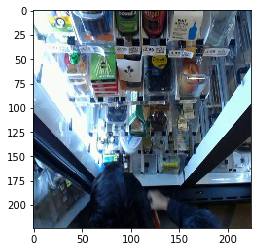

In [257]:
f = img.imread('img/f%d.jpg' % np.random.choice(frames.reshape(frames.size)))
plt.imshow(f)
plt.show()

# Real data preprocessing starts from here

In [258]:
count = 0
dataDict = {}
dataDict['data'] = []
dataDict['label'] = []
video_count = 0


for filename in os.listdir('.'):
    
    if filename.endswith('.avi'): 
        
        print (video_count)
        video_count += 1
        
        fileName = os.path.splitext(filename)[0]
        
        # read json
        fileNameEvents = fileName + '-events.json'
        events = simplejson.loads(open(fileNameEvents).read())
        
        # store start/end frames and labels            
        frames_start =[]
        frames_end = []
        temp_label_list = []
        for idx, event in enumerate(events):
            if event['event-class'] == '0 added':
                frames_start.append(event['start-frame'])
                frames_end.append(event['end-frame']-1)
                temp_label_list.append(0)
            elif event['event-class'] == '0 removed':
                frames_start.append(event['start-frame'])
                frames_end.append(event['end-frame']-1)
                temp_label_list.append(1)
            elif event['event-class'] == '1 added':
                frames_start.append(event['start-frame'])
                frames_end.append(event['end-frame']-1)
                temp_label_list.append(2)
            elif event['event-class'] == '1 removed':
                frames_start.append(event['start-frame'])
                frames_end.append(event['end-frame']-1)
                temp_label_list.append(3)
            
        frames_start = np.array(frames_start)
        frames_end = np.array(frames_end)
            
        # make a separate image folder
        if not os.path.isdir('img'):
            os.mkdir('img')
        temp = 'img/%s' % fileName
        if not os.path.isdir(temp):
            os.mkdir(temp)
            
        # num sample per video
        num_sample_per_video = 20
        num_frame_per_video = 5
        dataDict['label'] += temp_label_list*num_sample_per_video
        for j in range(num_sample_per_video):
            # sample frame indices
            frames = get_frames(num_frame_per_video, frames_start, frames_end)
            for i in range(frames_start.shape[0]):
                # load video
                fileNameVideo = fileName + '.avi'
                vidcap = cv2.VideoCapture(fileNameVideo)

                # data augmentation
                inputSize = 224 # for squeeze net input
                success,image = vidcap.read()
                count = 0
                success = True
                one_data = []
                while success:
                    success,image = vidcap.read()
                    if np.any(frames[:,i] == count):
                        # center crop
                        image_crop = image[100:500, 150:800]
                        # downsampling
                        image_down = cv2.resize(image_crop, dsize=(inputSize,inputSize), interpolation = cv2.INTER_CUBIC)
                        one_data.append(image_down)
                        # write image
                        # imageFileName = 'img/%s/f%d.jpg' % (fileName, count)
                        # cv2.imwrite(imageFileName, image_down)     # save frame as JPEG file
                    count += 1
                dataDict['data'].append(one_data)
                vidcap.release()
        
    else:
        continue

0
1
2
3
4
5
6
7
8
9
10
11
12
13


# test dimensions

In [259]:
print (np.array(dataDict['label']).shape)
print (np.array(dataDict['data']).shape)

(1960,)
(1960, 5, 224, 224, 3)


# efficent save in npy

In [260]:
from tempfile import TemporaryFile
np.save('data_5_frame.npy', dataDict['data'])
np.save('label_5_frame.npy', dataDict['label'])

# efficient load in npy

In [200]:
data = np.load("data_5_frame.npy")
label = np.load("label_5_frame.npy")

# test dimension again

In [213]:
print (np.array(dataDict['label']).shape)
print (np.array(dataDict['data']).shape)

(60,)
(60, 5, 224, 224, 3)


# save result in Json

In [19]:
import json
# each separate dict()
with open('label_squeeze.json', 'w') as fp:
    json.dump(np.array(dataDict['label']).tolist(), fp, indent=4)
with open('data_squeeze.json', 'w') as fp:
    json.dump(np.array(dataDict['data']).tolist(), fp, indent=4)

# load result in Json

In [20]:
with open('label_squeeze.json', 'r') as fp:
    label_load = json.load(fp)
with open('data_squeeze.json', 'r') as fp:
    data_load = json.load(fp)